# DSC410: EDA on Categorical Data
---

**Name**: Joseph Choi <br>
**Class**: DSC410-T301 Predictive Analytics (2243-1)

## Instructions
- Within the GitHub for Week 7, you’ll find a data set named eda_classification.csv. This data set contains both continuous and categorical variables and the target is binary (0 or 1). 
- Build a model that predicts ‘y’ (i.e., the column labeled ‘y’). Note that you’ll need to consider EDA and feature engineering to do this. 

## Table of Contents
- Data Cleaning
- EDA (Exploratory Data Analysis)
- Data Preprocessing and Feature Engineering
- Model Building
- Additional Documentation

## Data Cleaning
---
**Objective**: 
1. Exploring the dataset to understand what needs to be cleaned
2. Interpretation from initial data exploration (cleaning)
3. Addressing issues and ensuring that the dataset is ready for exploration and analysis

In [5]:
# Setup
import pandas as pd
import numpy as np

### 1. Exploring the dataset to understand what needs to be cleaned:

In [6]:
# Loading eda_classification csv file and displaying results

eda_classification = pd.read_csv('eda_classification.csv')
eda_classification.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
x0,-17.933519,-37.214754,0.330441,-13.709765,-4.202598,12.570277,17.949374,38.645268,35.279887,-31.756646,-18.497884
x1,Jun,July,Aug,Aug,May,July,Jun,Jun,Jun,July,July
x2,6.55922,10.77493,-19.609972,-8.01139,7.07621,2.543883,-35.406853,-21.871066,-2.004483,-5.499585,-4.119074
x3,-14.45281,-15.384004,-9.167911,6.759264,-26.004919,25.67362,-25.164967,-74.405515,-12.071977,6.198889,34.019325
x4,-4.732855,-0.077339,2.064124,1.727615,-4.269696,-0.842858,0.587439,-9.707926,-1.020028,-4.56955,3.351706
x5,0.381673,10.983774,12.071688,-1.768382,-3.414224,3.400531,-13.782894,6.114417,3.250741,13.902393,17.936091
x6,2.563194,-15.210206,12.506141,24.039733,2.115989,37.176963,-5.204895,-17.883435,-19.377852,1.0315,-3.831925
x7,"($1,306.52)",($24.86),($110.85),($324.43),"$1,213.37","($1,508.42)","($1,431.44)","$1,613.55","$1,178.11",($312.04),$126.05
x8,-89.394348,153.032652,-141.437276,51.039653,-31.0467,-98.956484,-205.638274,-239.151432,-108.229348,299.025699,32.576115
x9,-28.454044,-32.557736,-20.794952,-7.046908,19.061182,11.734073,16.399039,28.570116,-29.886388,24.338666,17.370882


In [7]:
# Displaying a summary of the dataset to gain insights into its structure and composition:
    # Checking information on null values per column 
    # Ensuring each column has the correct data type

eda_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9996 non-null   float64
 1   x1      9999 non-null   object 
 2   x2      9995 non-null   float64
 3   x3      9996 non-null   float64
 4   x4      9997 non-null   float64
 5   x5      9997 non-null   float64
 6   x6      9999 non-null   float64
 7   x7      9996 non-null   object 
 8   x8      9998 non-null   float64
 9   x9      9999 non-null   float64
 10  x10     9996 non-null   float64
 11  x11     9997 non-null   object 
 12  x12     9995 non-null   float64
 13  x13     9998 non-null   object 
 14  x14     9997 non-null   object 
 15  x15     9999 non-null   float64
 16  x16     9998 non-null   float64
 17  x17     9999 non-null   object 
 18  y       9999 non-null   int64  
dtypes: float64(12), int64(1), object(6)
memory usage: 1.4+ MB


In [8]:
# Displaying summary for numerical features:
    # Checking numerical measures like mean, median, and quartiles
    
numerical_summary = eda_classification.describe()
numerical_summary

,x0,x2,x3,x4,x5,x6,x8,x9,x10,x12,x15,x16,y
count,9996.000000,9995.000000,9996.000000,9997.000000,9997.000000,9999.000000,9998.000000,9999.000000,9996.000000,9995.000000,9999.000000,9998.000000,9999.000000
mean,6.501091,-3.729880,-7.335819,-0.001323,1.347141,1.214413,-4.239862,-0.297257,-22.482050,0.034517,-0.222981,-0.430020,0.491949
std,29.140034,17.237178,38.355015,3.995307,9.606695,17.352962,131.921984,37.987287,91.723733,6.065264,14.679529,2.825224,0.499960
min,-106.809919,-65.137848,-150.846091,-14.616540,-37.499530,-59.900503,-661.764937,-142.719688,-427.412374,-25.024464,-57.315771,-12.527505,0.000000
25%,-13.094564,-15.356197,-33.079854,-2.681308,-5.047927,-10.904697,-91.489340,-25.685742,-79.734745,-4.191568,-10.312554,-2.346461,0.000000
50%,6.659263,-3.825630,-7.374468,0.010637,1.217076,0.814006,-4.744892,-0.239779,-20.459860,0.154775,-0.633445,-0.415075,0.000000
75%,26.214107,7.764036,18.477979,2.635699,7.807128,12.693538,83.831778,25.459537,38.383398,4.136013,9.504719,1.448256,1.000000
max,114.823451,67.685933,127.204103,16.923269,38.624213,68.865261,476.910533,181.063340,319.592518,21.540626,57.918619,8.987513,1.000000


In [9]:
# Displaying summary for categorical features:
    # Exploring distribution and frequency for each categorical column
    # Identifying potential need for standardization in categorical columns
    # Verifying that only categorical features are present, ensuring exclusion of numerical features
    
categorical_features = eda_classification.select_dtypes(include=['object']).columns
for feature in categorical_features:
    print(f"\nDistribution of {feature}:")
    print(eda_classification[feature].value_counts())


Distribution of x1:
x1
July       2709
Jun        2357
Aug        2059
May        1144
sept.       912
Apr         413
Oct         246
Mar         116
Nov          27
Feb          10
Dev           5
January       1
Name: count, dtype: int64

Distribution of x7:
x7
($243.22)     3
$552.78       2
($35.66)      2
$824.89       2
($302.71)     2
             ..
($660.27)     1
($836.02)     1
$91.38        1
$1,514.51     1
($863.61)     1
Name: count, Length: 9849, dtype: int64

Distribution of x11:
x11
0.00%     3914
-0.01%    2409
0.01%     2361
0.02%      581
-0.02%     579
0.03%       73
-0.03%      72
-0.04%       4
0.04%        4
Name: count, dtype: int64

Distribution of x13:
x13
volkswagon    3132
Toyota        2773
bmw           1837
Honda         1277
tesla          545
chrystler      291
nissan          90
ford            39
mercades        11
chevrolet        3
Name: count, dtype: int64

Distribution of x14:
x14
wed          3709
thurday      3336
wednesday    1489
thur     

In [10]:
# Displaying null value count per feature:
    # Created to understand null value spread throughout dataset

null_count = eda_classification.isnull().sum()
null_count

x0     3
x1     0
x2     4
x3     3
x4     2
x5     2
x6     0
x7     3
x8     1
x9     0
x10    3
x11    2
x12    4
x13    1
x14    2
x15    0
x16    1
x17    0
y      0
dtype: int64

In [11]:
# Displaying null value percentage per feature
    # Created to understand null value percentage spread throughout dataset

null_percentage = (eda_classification.isnull().sum() / len(eda_classification)) * 100
null_percentage = null_percentage.round(3)
null_percentage

x0     0.03
x1     0.00
x2     0.04
x3     0.03
x4     0.02
x5     0.02
x6     0.00
x7     0.03
x8     0.01
x9     0.00
x10    0.03
x11    0.02
x12    0.04
x13    0.01
x14    0.02
x15    0.00
x16    0.01
x17    0.00
y      0.00
dtype: float64

In [12]:
# Displaying rows with null values
    # Created to sort through actual null value rows for better understanding

null_rows = eda_classification[eda_classification.isnull().any(axis=1)]
null_rows

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,y
192,46.253635,Aug,NaN,-34.750810,-3.664199,5.202812,0.593556,($17.43),231.128037,12.050742,-44.509410,-0.01%,-7.513439,Toyota,wed,11.496431,3.087272,small,0
740,11.575782,July,NaN,-10.465351,6.683835,5.107881,-17.402725,($71.41),48.832368,-34.006101,-42.819071,0.01%,3.767319,Honda,wed,-7.759168,-4.943520,small,0
1192,-40.809412,July,-12.104198,47.917965,NaN,0.149597,-7.495016,$125.39,17.340986,28.046385,31.114532,0.02%,-2.623253,volkswagon,wed,-26.903876,-5.145847,small,0
1597,20.045764,May,NaN,-5.541902,-5.068503,8.119220,-22.913331,$441.46,-63.478704,-51.218475,-73.914132,-0.01%,-5.820637,volkswagon,wed,15.166725,2.529946,small,1
1919,NaN,Jun,-12.029430,-41.680211,-3.755323,-1.906066,-5.101139,$300.59,-127.978247,15.344342,-137.632137,0.01%,-6.465966,Honda,wed,-2.430471,-2.403356,small,1
2164,-12.536523,Jun,-18.252567,-8.816692,3.565553,10.109102,34.574570,($248.26),126.810434,15.799768,-110.883920,-0.01%,4.364070,tesla,NaN,11.669800,-4.191252,small,1
2190,18.793730,sept.,NaN,-26.958147,3.591022,4.747377,14.421928,$881.70,-193.005483,-8.151406,-140.633576,0.00%,-2.939647,Honda,wed,0.208128,1.626390,small,0
2667,-37.135778,July,-23.326737,-86.227067,-2.626914,4.935380,9.139259,"$2,410.46",141.319293,-4.813688,NaN,0.01%,-2.716700,Honda,thurday,-0.751335,-0.012469,small,0
3293,-28.502369,July,23.520762,4.519007,0.453145,-4.984521,-8.323547,($660.57),-22.366428,10.017194,-45.002131,NaN,6.414234,volkswagon,thurday,24.947985,-2.507946,large,1
3320,26.590595,Jun,-28.929406,65.396067,8.926843,-15.986451,-18.055191,"$1,001.17",-91.175236,42.710421,-28.536582,0.00%,9.601066,bmw,thurday,-15.212485,NaN,small,0


### 2. Interpretation from initial data exploration (cleaning):

**Summary (.info), Null Value Count, and Null Value Percentage**: 
- Confirmed that there are null values in the dataset and gained insight to spread of missing values throughout dataset
- 1 to 4 null values each for 13 columns

**Summary for Categorical Features**:
- 3 columns need to be standardized
    - x1: Months standardized into first three letters of the month
    - x13: Automotive brands needs to be all lower cased and have the correct spelling
    - x14: Day of the week standardized into first three letters of the day
- 2 columns need to be converted to the correct data type (object to float)
    - x7
    - x11

### 3. Addressing issues and ensuring that the dataset is ready for exploration and analysis:

In [13]:
# Creating a copy of the df to perform data cleaning procedures

eda_classification_copy = eda_classification.copy()

In [14]:
# x1: Months standardized into first three letters of the month

# Mapping corrections 
month_mapping = {
    'July': 'Jul',
    'sept.': 'Sep',
    'Dev': 'Dec',
    'January': 'Jan'
}

# Replacing mapped values in 'x1' column
eda_classification_copy['x1'] = eda_classification_copy['x1'].replace(month_mapping)

# Displaying the updated distribution
eda_classification_copy['x1'].value_counts()

x1
Jul    2709
Jun    2357
Aug    2059
May    1144
Sep     912
Apr     413
Oct     246
Mar     116
Nov      27
Feb      10
Dec       5
Jan       1
Name: count, dtype: int64

In [15]:
# x13: Automotive brands needs to be all lower cased and have the correct spelling

# Mapping corrections
car_brand_mapping = {
    'Toyota': 'toyota',
    'Honda': 'honda',
    'mercades': 'mercedes',
    'volkswagon': 'volkswagen',
    'chrystler': 'chrysler'
}

# Replacing mapped values in 'x13' column
eda_classification_copy['x13'] = eda_classification_copy['x13'].replace(car_brand_mapping)

# Displaying the updated distribution
eda_classification_copy['x13'].value_counts()

x13
volkswagen    3132
toyota        2773
bmw           1837
honda         1277
tesla          545
chrysler       291
nissan          90
ford            39
mercedes        11
chevrolet        3
Name: count, dtype: int64

In [16]:
# x14: Day of the week standardized into first three letters of the day

# Mapping corrections
day_mapping = {
    'wed': 'Wed',
    'thurday': 'Thu',
    'wednesday': 'Wed',
    'thur': 'Thu',
    'tuesday': 'Tue',
    'friday': 'Fri',
    'monday': 'Mon',
    'fri': 'Fri'
}

# Replacing mapped values in 'x14' column
eda_classification_copy['x14'] = eda_classification_copy['x14'].replace(day_mapping)

# Displaying the updated distribution
eda_classification_copy['x14'].value_counts()

x14
Wed    5198
Thu    4433
Tue     214
Fri     137
Mon      15
Name: count, dtype: int64

In [17]:
# x7: Converting to the correct data type (object to float)

# Removing '$' and converting 'x7' to float
eda_classification_copy['x7'] = eda_classification_copy['x7'].replace('[\$,]', '', regex=True)

# Making '()' into a negative number
eda_classification_copy['x7'] = eda_classification_copy['x7'].replace('\(([^)]+)\)', r'-\1', regex=True)

# Converting 'x7' to float
eda_classification_copy['x7'] = eda_classification_copy['x7'].astype(float)

In [18]:
# x11: Converting to the correct data type (object to float)

# Removing '%' and converting 'x11' to float
eda_classification_copy['x11'] = eda_classification_copy['x11'].replace('%', '', regex=True).astype(float)

# Displaying the data types after conversion
eda_classification_copy.dtypes

x0     float64
x1      object
x2     float64
x3     float64
x4     float64
x5     float64
x6     float64
x7     float64
x8     float64
x9     float64
x10    float64
x11    float64
x12    float64
x13     object
x14     object
x15    float64
x16    float64
x17     object
y        int64
dtype: object

## EDA (Exploratory Data Analysis)
**Objective**: 
1. Build plots to gain insights that will guide the preprocessing and feature engineering process
    - **Univariate**:
        - Histograms (numerical distribution)
        - Bar charts (categorical distribution)
        - Boxplots (outliers)
    - **Bivariate**:
        - Countplots (relationship: categorical vs y)
        - Correlation matrix (relationship: numerical vs y)
2. Interpretation from the plots

In [19]:
# Setup
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Build plots to gain insights that will guide the preprocessing and feature engineering process:

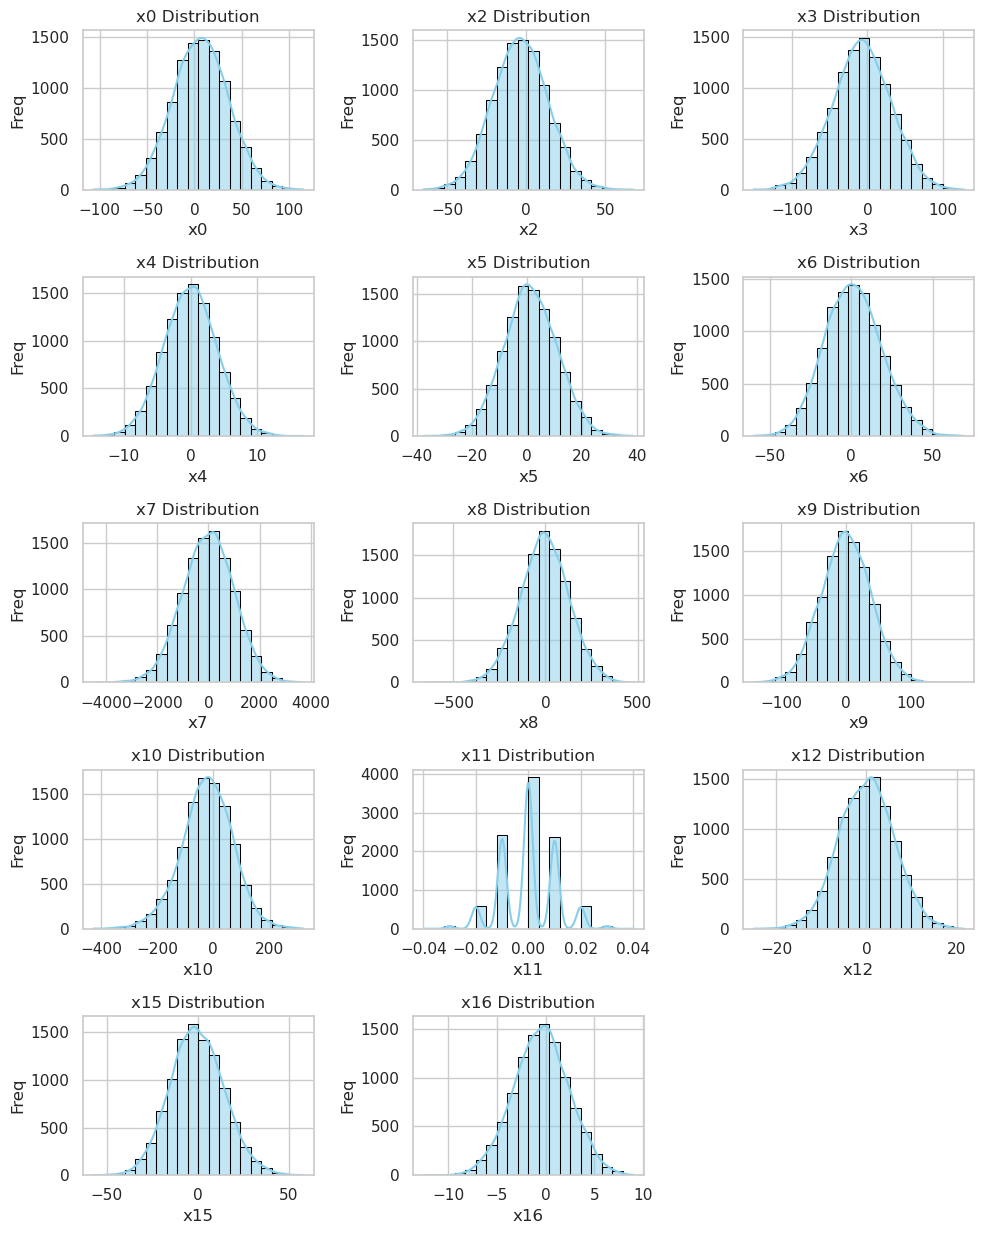

In [40]:
# Histograms:

# Setting the style for the plots
sns.set(style="whitegrid")

# Extracting numerical and categorical features
numerical_features = eda_classification_copy.select_dtypes(include=['float64']).columns
categorical_features = eda_classification_copy.select_dtypes(include=['object']).columns

# Plotting histograms for numerical features
num_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0)  # Calculate the number of rows
plt.figure(figsize=(10, 2.5 * num_rows))

for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(eda_classification_copy[feature], bins=20, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Freq')

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing plots
plt.show()

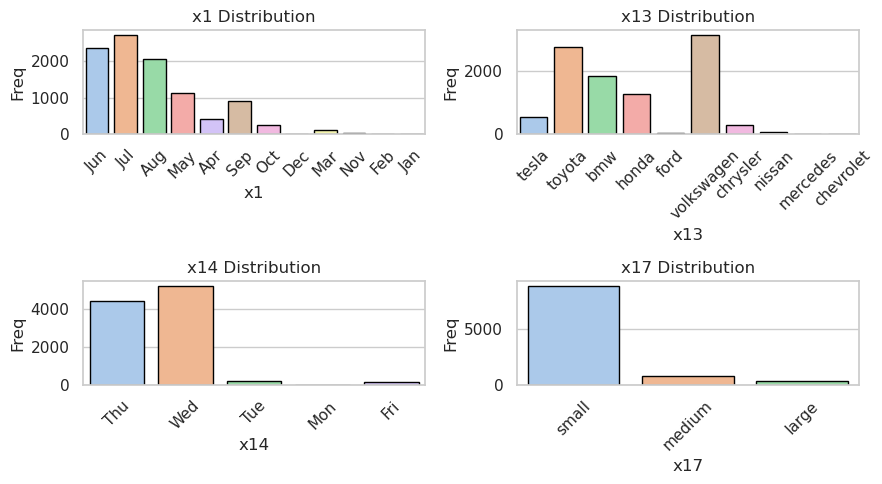

In [43]:
# Bar Charts:

# Setting the style for the plots
sns.set(style="whitegrid")

# Extracting categorical features
categorical_features = ['x1', 'x13', 'x14', 'x17']

# Calculating the number of rows and columns for subplots
num_rows_cat = len(categorical_features) // 2 + (len(categorical_features) % 2 > 0)  # Ensure at least one row
num_cols_cat = min(2, len(categorical_features))  # Maximum 2 columns

# Creating subplots
fig_cat, axes_cat = plt.subplots(num_rows_cat, num_cols_cat, figsize=(9, 2.5 * num_rows_cat))

# Flattening the axes array to make it easier to iterate
axes_cat = axes_cat.flatten()

# Plotting countplots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(x=eda_classification_copy[feature], palette='pastel', edgecolor='black', ax=axes_cat[i])
    axes_cat[i].set_title(f'{feature} Distribution')
    axes_cat[i].set_xlabel(feature)
    axes_cat[i].set_ylabel('Freq')
    axes_cat[i].tick_params(axis='x', rotation=45)

# Removing empty subplots
for j in range(len(categorical_features), num_rows_cat * num_cols_cat):
    fig_cat.delaxes(axes_cat[j])

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing results
plt.show()

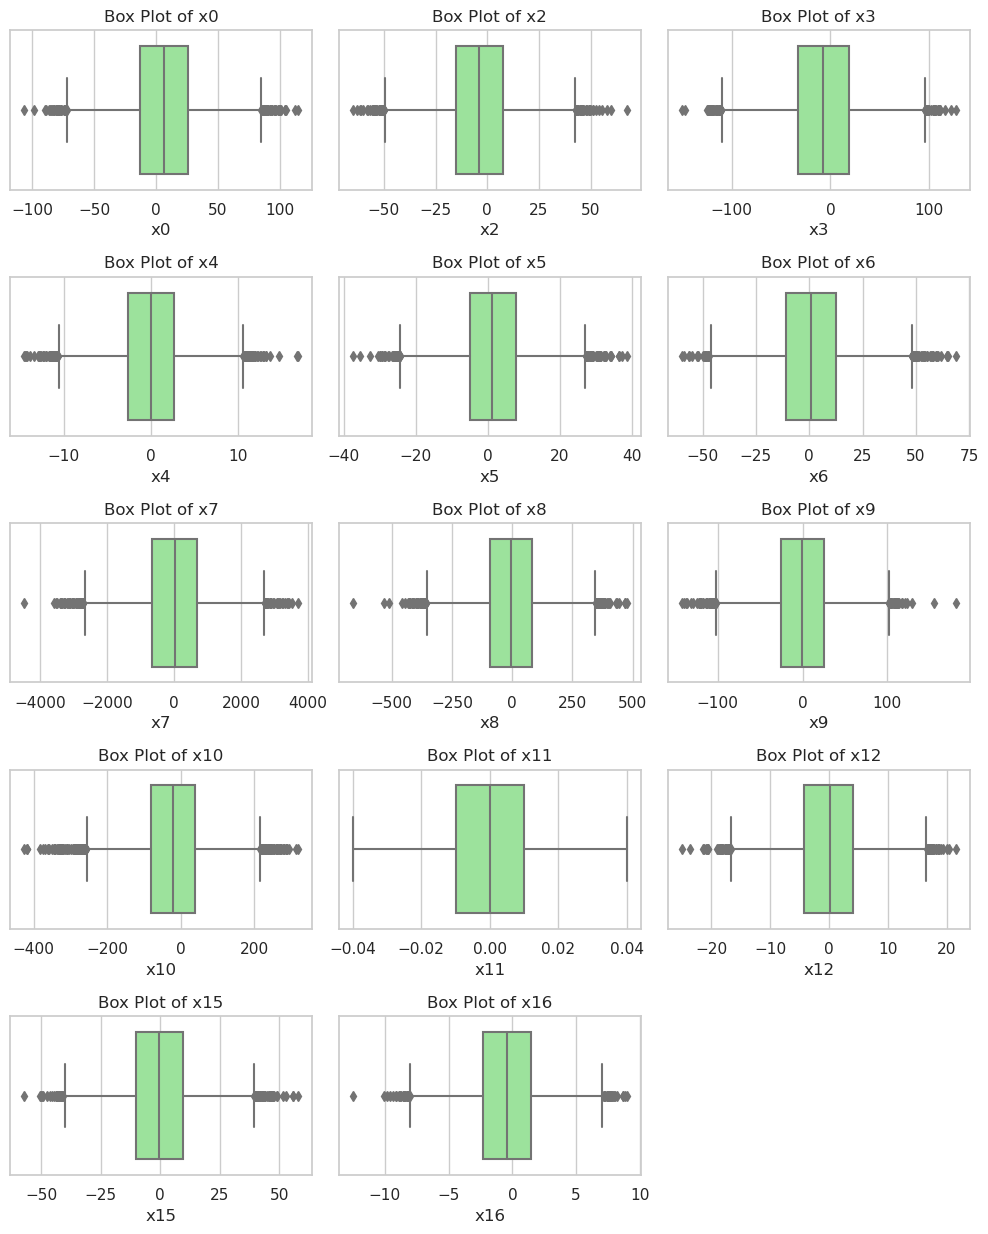

In [36]:
# Boxplots:

# Setting the style for the plots
sns.set(style="whitegrid")

# Calculating the number of rows and columns for subplots
num_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0) 
num_cols = min(3, len(numerical_features)) 

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2.5 * num_rows))

# Flattening the axes array to make it easier to iterate
axes = axes.flatten()

# Plotting box plots for numerical features
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=eda_classification_copy[feature], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Removing empty subplots
for j in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing results
plt.show()

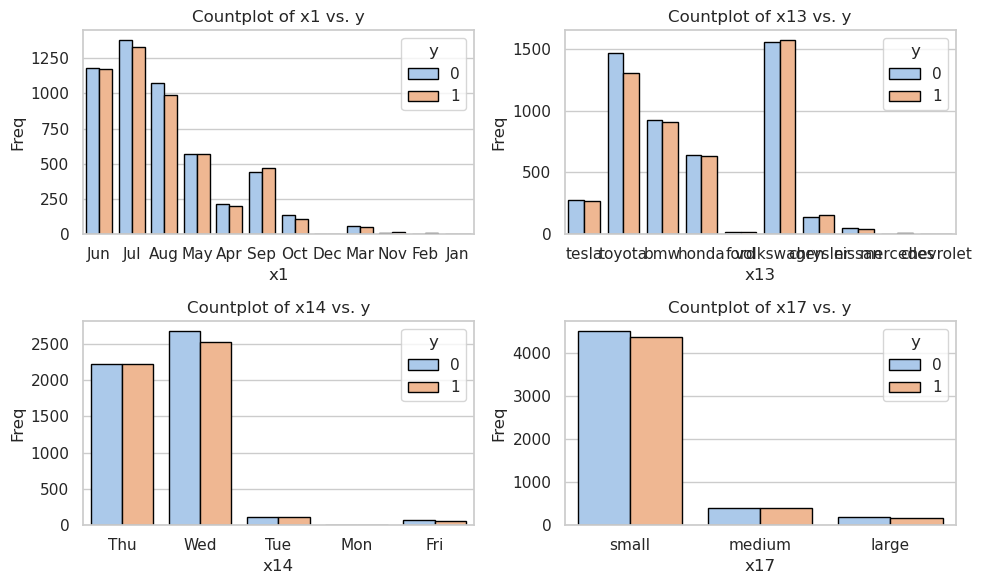

In [48]:
# Countplots:

# Setting the style for the plots
sns.set(style="whitegrid")

# Extracting categorical features
categorical_features = ['x1', 'x13', 'x14', 'x17']

# Calculating the number of rows and columns for subplots
num_rows = len(categorical_features) // 2 + (len(categorical_features) % 2 > 0)  # Ensure at least one row
num_cols = min(2, len(categorical_features))  # Maximum 2 columns

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 3 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plotting countplots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='y', data=eda_classification_copy, palette='pastel', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Countplot of {feature} vs. y')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Freq')
    axes[i].legend(title='y', loc='upper right')

# Removing empty subplots
for j in range(len(categorical_features), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing results
plt.show()

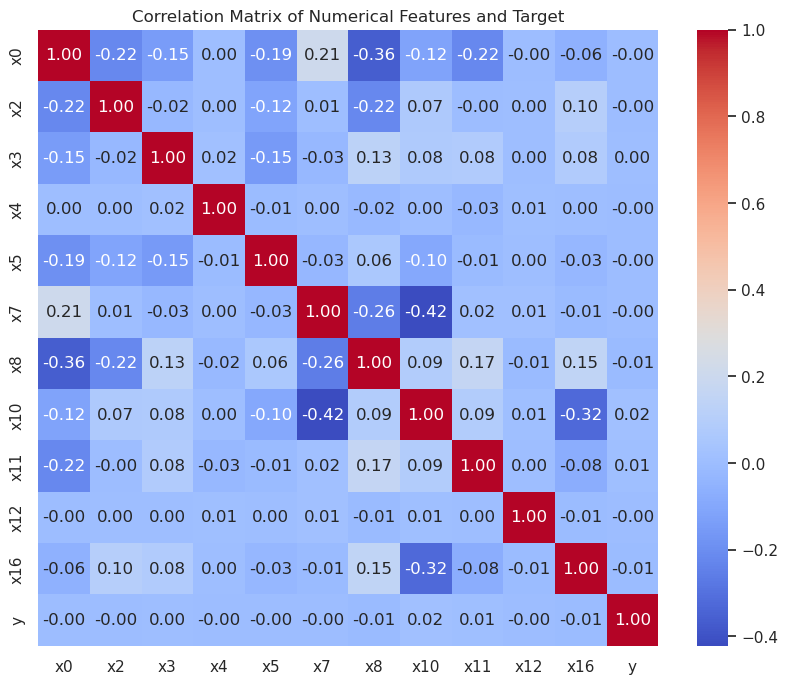

In [82]:
# Correlation Matrix:

# Setting up correlation matrix
correlation_matrix = eda_classification_copy[numerical_features + ['y']].corr()

# Plotting correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target')

# Printing results
plt.show()

### 2. Interpretation from the plots:

**Observation**:
- **Histograms**: 
    - Plots display a bell-shaped curve, suggesting a normal distribution (symmetrical and well-behaved distribution around the mean)
    - Peaks are all around the 0 mark, the mean of the dataset. Verified with the output of eda_classification.describe() and my boxplots (middle line close to 0)
- **Bar charts**: 
    - Plots display varying bar sizes between different variables, indicating an uneven distribution (disparities in bar heights)
    - x1 (month): Winter season (Nov-Feb) is close to empty
    - x13 (car brand): Ford, Nissan, Mercedes, and Chevrolet are close to empty
    - x14 (days of the week): Tue, Mon, and Fri are close to empty
    - x17 (size): Medium and large are close to empty
- **Boxplots**: 
    - There appears to be outliers for almost all numerical features as there are circles outside of the tails
- **Countplots**:
    - Each countplot displays a relatively even split between the categories 0 and 1 from the target variable 'y'. The bar heights for each category within a feature are similar across the plots.
- **Correlation matrix**: 
    - The last row of the correlation matrix shows the correlation coefficients between each numerical feature and the target variable 'y'. The correlation coefficients show values close to zero. 

**Interpretation:**
- **Histograms (numerical distribution)**: 
    - My strategy for handling null values was to use the mean if the numerical feature follows a normal distribution and use the median for the numerical features that is skewed  (median: less sensitive to extreme values). Since all of the histograms display a bell-shaped curve (normal distribution), I will be using the mean to handle all of the null values.
- **Bar charts (categorical distribution)**:
    - Since the bar charts all show a dominant category per feature, I will use the mode (most frequently ocurring category) to handle null values as it will accurately represent the majority of the data.
- **Box plots (outliers)**:
    - In a real work environment, I would consult with domain experts to get insights into whether these outliers are valuable information and how they would affect the model. Once I have a good grasp, I would make the decision to either remove outliers, apply log transformation or scaling technicques, or keep them in. Here in this scenario, details about the columns in the dataset is largely unknown. But what I do know is that I have numerical features displays normal distribution. When dealing with features that follow a normal distribution, outliers can significantly affect the performance of models. Therefore, my plan is to remove them altogether. 
- **Countplots (relationships)**:
    - The even distribution of the target variable 'y' within each category suggests that the categorical features (x1, x13, x14, x17) may not be strong predictors for the target variable. In other words, the distribution of 'y' appears to be relatively consistent across different categories of these features.
    - To improve the data to be more predictive to model training, I am planning to:
        - Group rare/less frequent categories into 'other'
        - One-hot encoding my categorical features
    - Why? By grouping less frequent categories and using one-hot encoding, I want to provide the model with a more consolidated and meaningful input of categorical features. This can contribute to better generalization, improving the model's predictive performance.
- **Correlation matrix**: 
    - Correlation coefficients close to zero indicates weak linear relationship between the numerical features and the target variable.

## Data Preprocessing and Feature Engineering
- Preprocessing data to make it suitable for modeling & performing feature engineering based on insights gained from EDA
- **Objective**:
    1. Handle null values
    2. Remove outliers
    3. Group rare/less frequent categories into 'Other'
    4. Perform one hot encoding for all categorical features

In [52]:
# Creating a copy to perform preprocessing and feature engineering
eda_classification_fe = eda_classification_copy.copy()

### 1. Handle Null Values:
- **Numerical values**: Mean
- **Categorical values**: Mode

In [53]:
# Defining the list of numerical and categorical features with missing values
numerical_features = ['x0', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x10', 'x11', 'x12', 'x16']
categorical_features = ['x13', 'x14']

# Handling missing values for numerical features with mean
eda_classification_fe[numerical_features] = eda_classification_fe[numerical_features].fillna(eda_classification_fe[numerical_features].mean())

# Handling missing values for categorical features with mode
eda_classification_fe[categorical_features] = eda_classification_fe[categorical_features].fillna(eda_classification_fe[categorical_features].mode().iloc[0])

# Verifying that all null values were handled correctly
null_count_fe = eda_classification_fe.isnull().sum()
null_count_fe

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
y      0
dtype: int64

### 2. Remove Outliers:

In [58]:
# Defining the numerical features with outliers
numerical_features_with_outliers = ['x0', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x12', 'x15', 'x16']

# Creating function to remove outliers based on IQR (interquartile range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) # First quartile or the 25th percentile
    Q3 = df[column].quantile(0.75) # Third quartile or the 7th percentile
    IQR = Q3 - Q1 # Difference between third quartile and first quartile
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Looping through numerical features and remove outliers
for feature in numerical_features_with_outliers:
    eda_classification_fe = remove_outliers(eda_classification_fe, feature)

#### JC Comment: 
I chose IQR method to remove outliers as it was the most common method used. I referenced this link to remove outliers (https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/) 

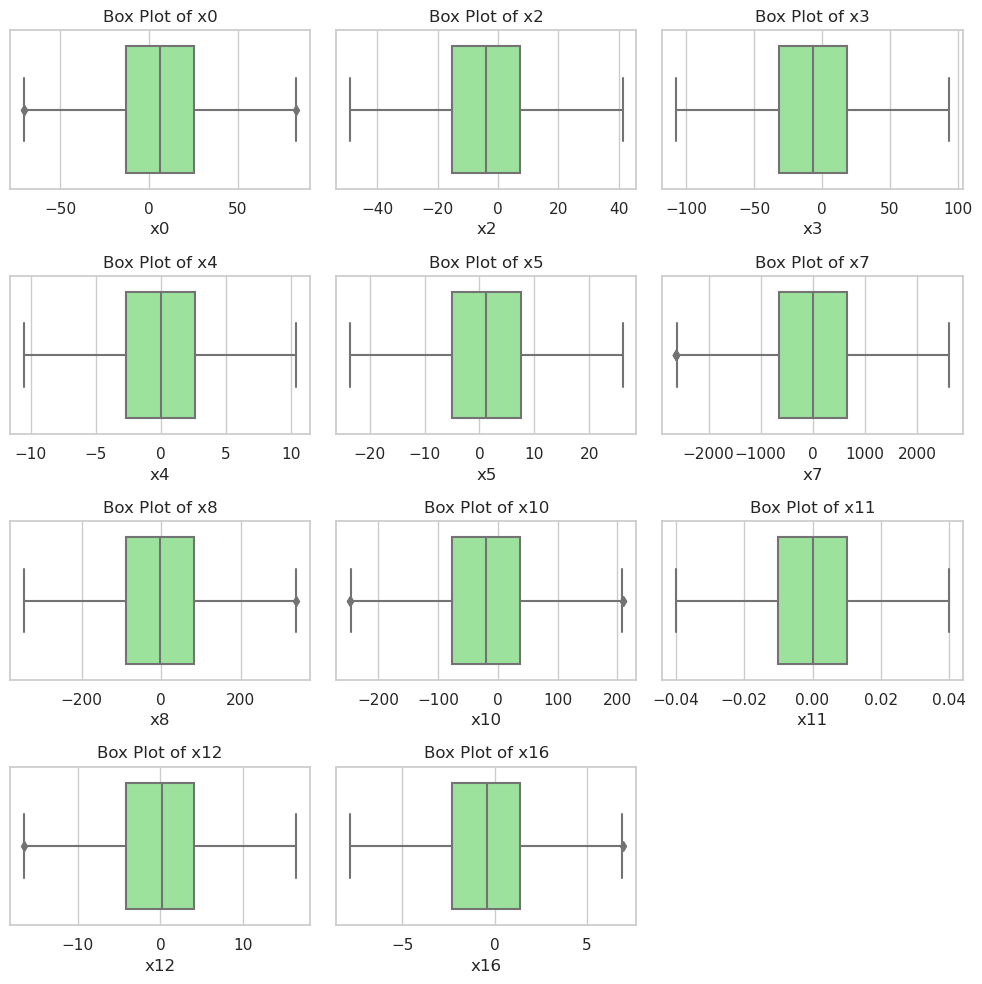

In [59]:
# Boxplots after removing outliers:

# Setting the style for the plots
sns.set(style="whitegrid")

# Calculating the number of rows and columns for subplots
num_rows = len(numerical_features) // 3 + (len(numerical_features) % 3 > 0) 
num_cols = min(3, len(numerical_features)) 

# Creating subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 2.5 * num_rows))

# Flattening the axes array to make it easier to iterate
axes = axes.flatten()

# Plotting box plots for numerical features
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=eda_classification_fe[feature], color='lightgreen', ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

# Removing empty subplots
for j in range(len(numerical_features), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing results
plt.show()

### 3. Group rare/less frequent categories into 'Other':
- **x1 (month)**: Group 'Nov', 'Dec', 'Jan', and 'Feb' to 'Other'
- **x13 (car brand)**: Group 'Ford', 'Nissan', 'Mercedes', and 'Chevrolet' to 'Other'
- **x14 (days of the week)**: Group 'Tue', 'Mon', and 'Fri' to 'Other'
- **x17 (size)**: Group 'medium' and 'large' are close to empty

In [68]:
# Defining the categories to be grouped as 'Other' for each column
grouping_mapping = {
    'x1': {'Nov': 'Other', 'Dec': 'Other', 'Jan': 'Other', 'Feb': 'Other'},
    'x13': {'ford': 'Other', 'nissan': 'Other', 'mercedes': 'Other', 'chevrolet': 'Other'},
    'x14': {'Tue': 'Other', 'Mon': 'Other', 'Fri': 'Other'},
    'x17': {'medium': 'Other', 'large': 'Other'}
}

# Looping through each column and apply the grouping
for column, mapping in grouping_mapping.items():
    eda_classification_fe[column] = eda_classification_fe[column].replace(mapping)

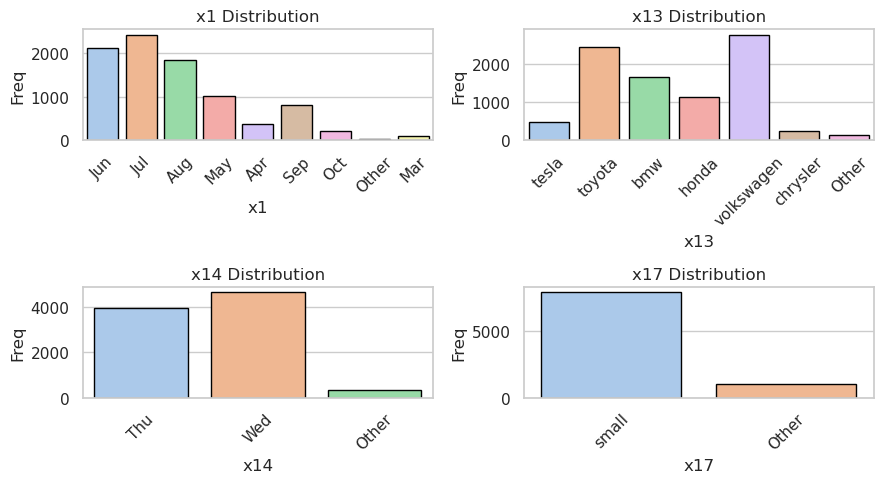

In [70]:
# Bar Charts after grouping less frequent categories:

# Setting the style for the plots
sns.set(style="whitegrid")

# Extracting categorical features
categorical_features = ['x1', 'x13', 'x14', 'x17']

# Calculating the number of rows and columns for subplots
num_rows_cat = len(categorical_features) // 2 + (len(categorical_features) % 2 > 0)  # Ensure at least one row
num_cols_cat = min(2, len(categorical_features))  # Maximum 2 columns

# Creating subplots
fig_cat, axes_cat = plt.subplots(num_rows_cat, num_cols_cat, figsize=(9, 2.5 * num_rows_cat))

# Flattening the axes array to make it easier to iterate
axes_cat = axes_cat.flatten()

# Plotting countplots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(x=eda_classification_fe[feature], palette='pastel', edgecolor='black', ax=axes_cat[i])
    axes_cat[i].set_title(f'{feature} Distribution')
    axes_cat[i].set_xlabel(feature)
    axes_cat[i].set_ylabel('Freq')
    axes_cat[i].tick_params(axis='x', rotation=45)

# Removing empty subplots
for j in range(len(categorical_features), num_rows_cat * num_cols_cat):
    fig_cat.delaxes(axes_cat[j])

# Adjusting layout to prevent overlapping
plt.tight_layout()

# Printing results
plt.show()

### 4. Perform one hot encoding for all categorical features

In [74]:
# Performing one-hot encoding for categorical features
eda_classification_fe_encoded = pd.get_dummies(eda_classification_fe, columns=['x1', 'x13', 'x14', 'x17'])

# Printing the encoded DataFrame
eda_classification_fe_encoded.head().T

,0,1,2,3,4
x0,-17.933519,-37.214754,0.330441,-13.709765,-4.202598
x2,6.55922,10.77493,-19.609972,-8.01139,7.07621
x3,-14.45281,-15.384004,-9.167911,6.759264,-26.004919
x4,-4.732855,-0.077339,2.064124,1.727615,-4.269696
x5,0.381673,10.983774,12.071688,-1.768382,-3.414224
x6,2.563194,-15.210206,12.506141,24.039733,2.115989
x7,-1306.52,-24.86,-110.85,-324.43,1213.37
x8,-89.394348,153.032652,-141.437276,51.039653,-31.0467
x9,-28.454044,-32.557736,-20.794952,-7.046908,19.061182
x10,-16.201298,69.675903,55.042604,-31.424419,-31.525515


## Model Building
- Choosing the right algorithm for binary classification
- Training the model using the cleaned and preprocessed data
- Interpretation from evaluation

In [87]:
# Setup

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1. Choosing the right algorithm for binary classification:
From my EDA process, I found that my correlation matrix indicated weak linear relationships and my countplots suggested that the categorical features may not individually exhibit strong predictive power for the target variable. Therefore, I have decided to use decision tree as this model is known to be capable of capturing non-linear relationships between features and the target variable. 

**Action List**:
- Split data into features (X) and the target variable (y)
- Split the data into training and testing sets via 'train_test_split'
- Initialize the decision tree classifier and train it using the training data
- Make predictions on both the training and testing sets
- Evaluate the model's performance using accuracy scores and classification report

### 2. Training the model using the cleaned and preprocessed data:

In [88]:
# Separating features and target variable
X = eda_classification_fe_encoded.drop(columns=['y'])  # Features
y = eda_classification_fe_encoded['y']  # Target variable

In [89]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Initializing the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

In [91]:
# Training the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [92]:
# Predicting on the training and testing set
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

In [93]:
# Evaluating the model
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Printing results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.49355019629837354


In [94]:
# Classification report:
print("\nClassification Report:")
print(classification_report(y_test, test_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51       908
           1       0.48      0.47      0.48       875

    accuracy                           0.49      1783
   macro avg       0.49      0.49      0.49      1783
weighted avg       0.49      0.49      0.49      1783



### 3. Interpretation from evaluation:

- **Training Accuracy**: 
    - Model achieved accuracy of 100% on the training data
    - Could indicate overfitting, where the model has memorized the training data and may not generalize well to unseen data
- **Testing Accuracy**: 
    - Accuracy on the testing data is 49.36%
    - This may suggest that the model's performance on unseen data is only slightly better than random guessing
    - Model may not be catching meaningful patterns in the data
- **Precision and Recall**: 
    - For both classes 0 and 1, the precision and recall scores are balanced
    - Indicates that the model is making predictions for both classes with similar levels of correctness and completeness
- **Overall Assessment**: 
    - Model's performance is mediocre
    - Training accuracy suggests overfitting, which may be contributing to the model's poor generalization to unseen data
    - Further modeling tuning and feature engineering may be needed to improve performance

## Additional Documentation

As I needed more documentation in my previous assignment per your feedback, I decided to focus more on describing the logic behind my codes rather than documenting my usual code breakdowns. This week, my main objective was to describe the intent of my actions and thoughts rather than simply describing the code. I've included interpretation sections for this assignment to provide details relating to my observations and analysis. I decided how to clean, preprocess, feature engineer, and model my dataset through my interpretations. My biggest challenge for this assignment is to see if I am accurately interpreting my code output and data visualizations and correctly making decisions based on my analysis. Your feedback on my documentation and my decision-making are much appreciated. 